In [1]:
import numpy as np
from astropy import constants as const
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import dustapprox
from dustapprox import literature

In [2]:
data=fits.open('data_table_v2.fits')
table=Table.read(data)

In [3]:
print(table.columns)

<TableColumns names=('sobject_id','gaiadr3_source_id','ra','dec','rv_comp_1','teff','e_teff','logg','e_logg','fe_h','e_fe_h','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','ruwe','phot_g_mean_mag','bp_rp','phot_bp_rp_excess_factor')>


In [4]:
#finding sun like stars in the dataset
index=np.where((table["logg"]>4) & (table["teff"]<6000) & (table["teff"]>5000) & (table["ruwe"]<1.4))
table_sunlike=table[:][index]

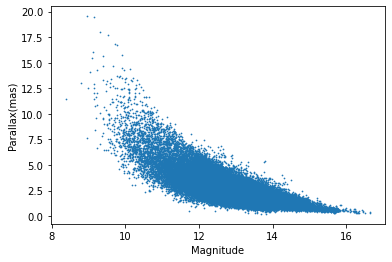

In [5]:
plt.scatter(table_sunlike["phot_g_mean_mag"], abs(table_sunlike["parallax"]), s=0.5)
plt.xlabel("Magnitude")
plt.ylabel("Parallax(mas)")
plt.show()

In [6]:
#Calculating the expected absolute magnitude as function of parallax(in mas) for sun like stars
x=np.linspace(0.1,15,1000)
def g(x):
    return 4.68-5*(np.log10(x))+10

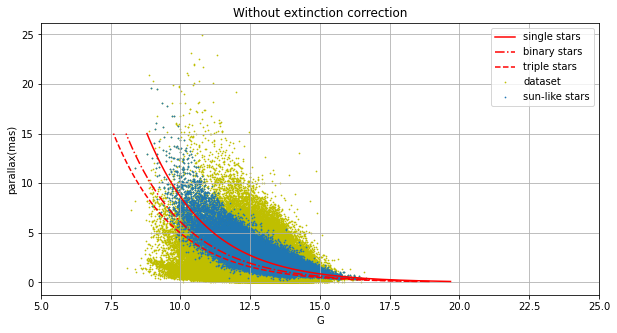

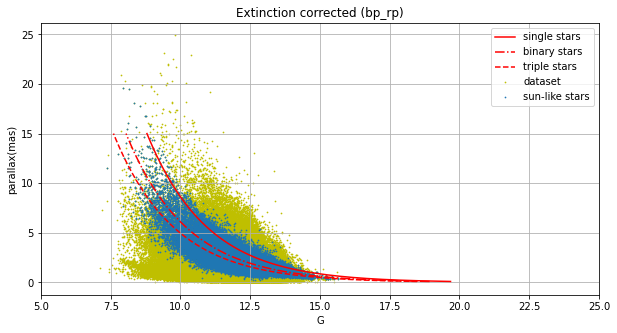

In [7]:
#calculating the extinction
a0=table["phot_bp_rp_excess_factor"]
a0_s=table_sunlike["phot_bp_rp_excess_factor"]
obj=literature.edr3.edr3_ext()
extinct=obj.from_bprp(name='kG',bprp= table["bp_rp"],a0=a0, flavor='ms')
extinct_sun=obj.from_bprp(name='kG',bprp= table_sunlike["bp_rp"],a0=a0_s, flavor='ms')

#extinction corrected magnitudes
mag_corr=table["phot_g_mean_mag"]-extinct*a0
mag_corr_sun=table_sunlike["phot_g_mean_mag"]-extinct_sun*a0_s

#plots
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(table["phot_g_mean_mag"], abs(table["parallax"]),c="y", s=0.5, label="dataset")
plt.scatter(table_sunlike["phot_g_mean_mag"], abs(table_sunlike["parallax"]), s=0.5, label="sun-like stars")
plt.plot(g(x), x, "r-", label="single stars") #single stars
plt.plot(g(x)-0.75, x, "r-.", label="binary stars") #binary stars
plt.plot(g(x)-1.2, x, "r--", label="triple stars") #triple stars
plt.xlim(5,25)
plt.xlabel("G")
plt.ylabel("parallax(mas)")
plt.legend()
plt.title("Without extinction correction")

plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(mag_corr, abs(table["parallax"]),c="y", s=0.5, label="dataset")
plt.scatter(mag_corr_sun, abs(table_sunlike["parallax"]), s=0.5, label="sun-like stars")
plt.plot(g(x), x, "r-", label="single stars") #single stars
plt.plot(g(x)-0.75, x, "r-.", label="binary stars") #binary stars
plt.plot(g(x)-1.2, x, "r--", label="triple stars") #triple stars
plt.xlim(5,25)
plt.xlabel("G")
plt.ylabel("parallax(mas)")
plt.legend()
plt.title("Extinction corrected (bp_rp)")
plt.show()

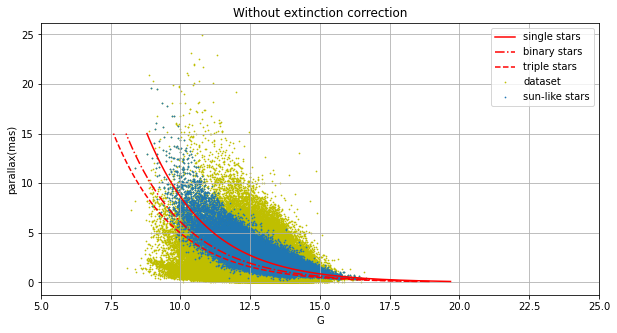

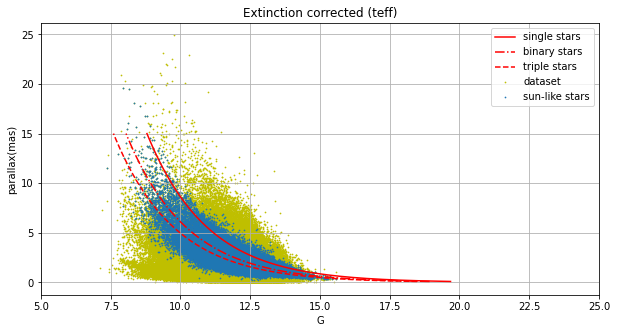

In [8]:
obj=literature.edr3.edr3_ext()
extinct=obj.from_teff(name='kG',teff= table["teff"],a0=a0, flavor='ms')
extinct_sun=obj.from_teff(name='kG',teff= table_sunlike["teff"],a0=a0_s, flavor='ms')

mag_corr=table["phot_g_mean_mag"]-extinct*a0
mag_corr_sun=table_sunlike["phot_g_mean_mag"]-extinct_sun*a0_s



plt.figure(figsize=(10,5))
plt.scatter(table["phot_g_mean_mag"], abs(table["parallax"]),c="y", s=0.5,  label="dataset")
plt.scatter(table_sunlike["phot_g_mean_mag"], abs(table_sunlike["parallax"]), s=0.5, label="sun-like stars")
plt.plot(g(x), x, "r-", label="single stars") #single stars
plt.plot(g(x)-0.75, x, "r-.", label="binary stars") #binary stars
plt.plot(g(x)-1.2, x, "r--", label="triple stars") #triple stars
plt.grid()
plt.xlim(5,25)
plt.xlabel("G")
plt.ylabel("parallax(mas)")
plt.legend()
plt.title("Without extinction correction")


plt.figure(figsize=(10,5))
plt.scatter(mag_corr, abs(table["parallax"]),c="y", s=0.5,  label="dataset")
plt.scatter(mag_corr_sun, abs(table_sunlike["parallax"]), s=0.5, label="sun-like stars")
plt.plot(g(x), x, "r-", label="single stars") #single stars
plt.plot(g(x)-0.75, x, "r-.", label="binary stars") #binary stars
plt.plot(g(x)-1.2, x, "r--", label="triple stars") #triple stars
plt.grid()
plt.xlim(5,25)
plt.xlabel("G")
plt.ylabel("parallax(mas)")
plt.legend()
plt.title("Extinction corrected (teff)")
plt.show()

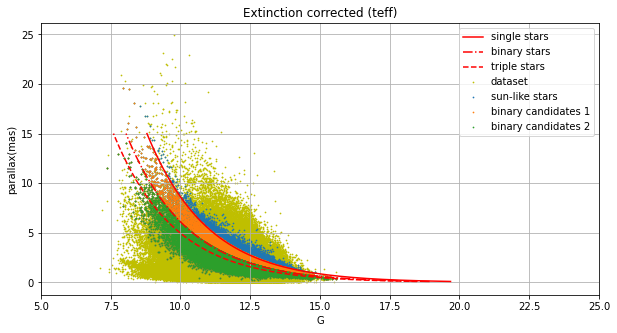

In [9]:
index1 = np.where(table_sunlike["phot_g_mean_mag"]-extinct_sun*a0_s<g(table_sunlike["parallax"]))
binary_cand1=table_sunlike[:][index1]
index2 = np.where(table_sunlike["phot_g_mean_mag"]-extinct_sun*a0_s<g(table_sunlike["parallax"])-0.75)
binary_cand2=table_sunlike[:][index2]
plt.figure(figsize=(10,5))
plt.scatter(mag_corr, abs(table["parallax"]),c="y", s=0.5,  label="dataset")
plt.scatter(mag_corr_sun, abs(table_sunlike["parallax"]), s=0.5, label="sun-like stars")
plt.scatter(mag_corr_sun[index1],binary_cand1["parallax"], s=0.5, label="binary candidates 1")
plt.scatter(mag_corr_sun[index2],binary_cand2["parallax"], s=0.5, label="binary candidates 2")
plt.plot(g(x), x, "r-", label="single stars") #single stars
plt.plot(g(x)-0.75, x, "r-.", label="binary stars") #binary stars
plt.plot(g(x)-1.2, x, "r--", label="triple stars") #triple stars
plt.grid()
plt.xlim(5,25)
plt.xlabel("G")
plt.ylabel("parallax(mas)")
plt.legend()
plt.title("Extinction corrected (teff)")
plt.show()


In [10]:
# print(binary_cand1)
# print(binary_cand2)

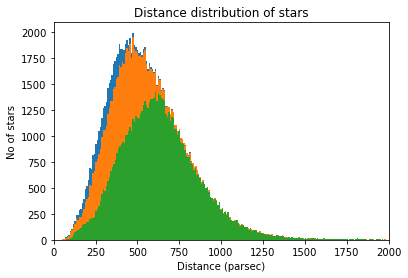

In [13]:
# plt.hist(1000/table["parallax"],bins=1000)
plt.hist(1000/table_sunlike["parallax"],bins=500)
plt.hist(1000/binary_cand1["parallax"],bins=500)
plt.hist(1000/binary_cand2["parallax"],bins=500)
plt.xlabel("Distance (parsec)")
plt.ylabel("No of stars")
plt.xlim(0,2000)
plt.title("Distance distribution of stars")
plt.show()

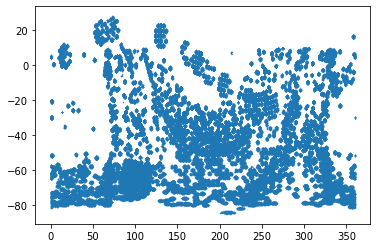

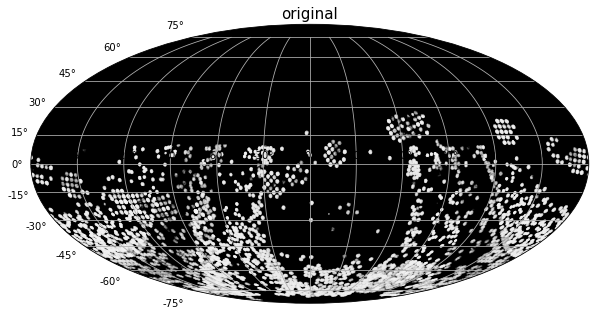

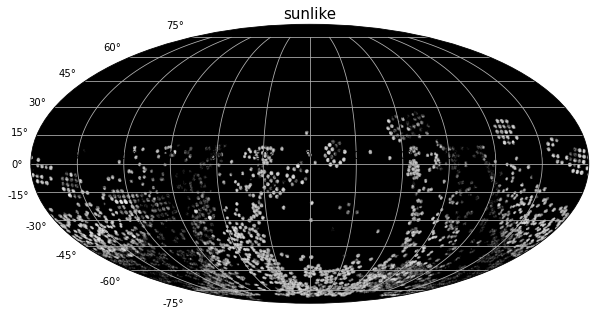

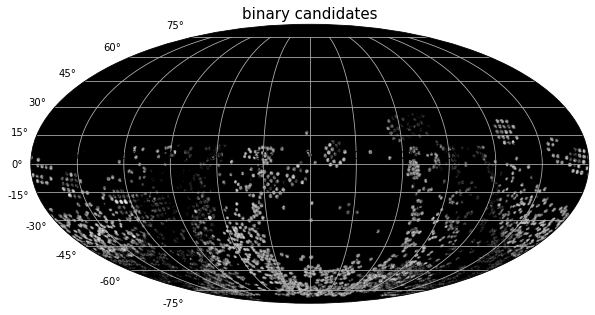

In [12]:
plt.scatter(table["ra"],table["dec"],s=0.1)

#mollweide projection of the stars

def mollplot(ra,dec,mag,t):
    for i in range(len(ra)):
        if(ra[i]>180):
            ra[i]-=360
    ra=np.pi*ra/(180)
    dec=dec*np.pi/180
    fig1=plt.figure(figsize=(10,10))
    axO=fig1.add_subplot(111, projection="mollweide",facecolor='black')
    axO.scatter(ra,dec,s=mag/10000,c='white')
    axO.set(title=t)
    axO.grid("w--")
    axO.title.set_fontsize(15)
    
mollplot(table['ra'],table['dec'],table["phot_g_mean_mag"],'original')
mollplot(table_sunlike['ra'],table_sunlike['dec'],table_sunlike["phot_g_mean_mag"],'sunlike')
mollplot(binary_cand2['ra'],binary_cand2['dec'],binary_cand2["phot_g_mean_mag"],'binary candidates')